In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
%matplotlib inline
pd.options.display.max_columns=100

In [2]:
df=pd.read_csv('FuelConsumption.csv')
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

### Since ther are no missing values, we don't need to perform any kind of cleaning operations.

---
# 🍀Data Visualization

In [6]:
df['MAKE'].unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [7]:
df['MAKE'].value_counts().reset_index()

,MAKE,count
0,FORD,90
1,CHEVROLET,86
2,BMW,64
3,MERCEDES-BENZ,59
4,GMC,49
5,AUDI,49
6,TOYOTA,49
7,PORSCHE,44
8,VOLKSWAGEN,42
9,DODGE,39


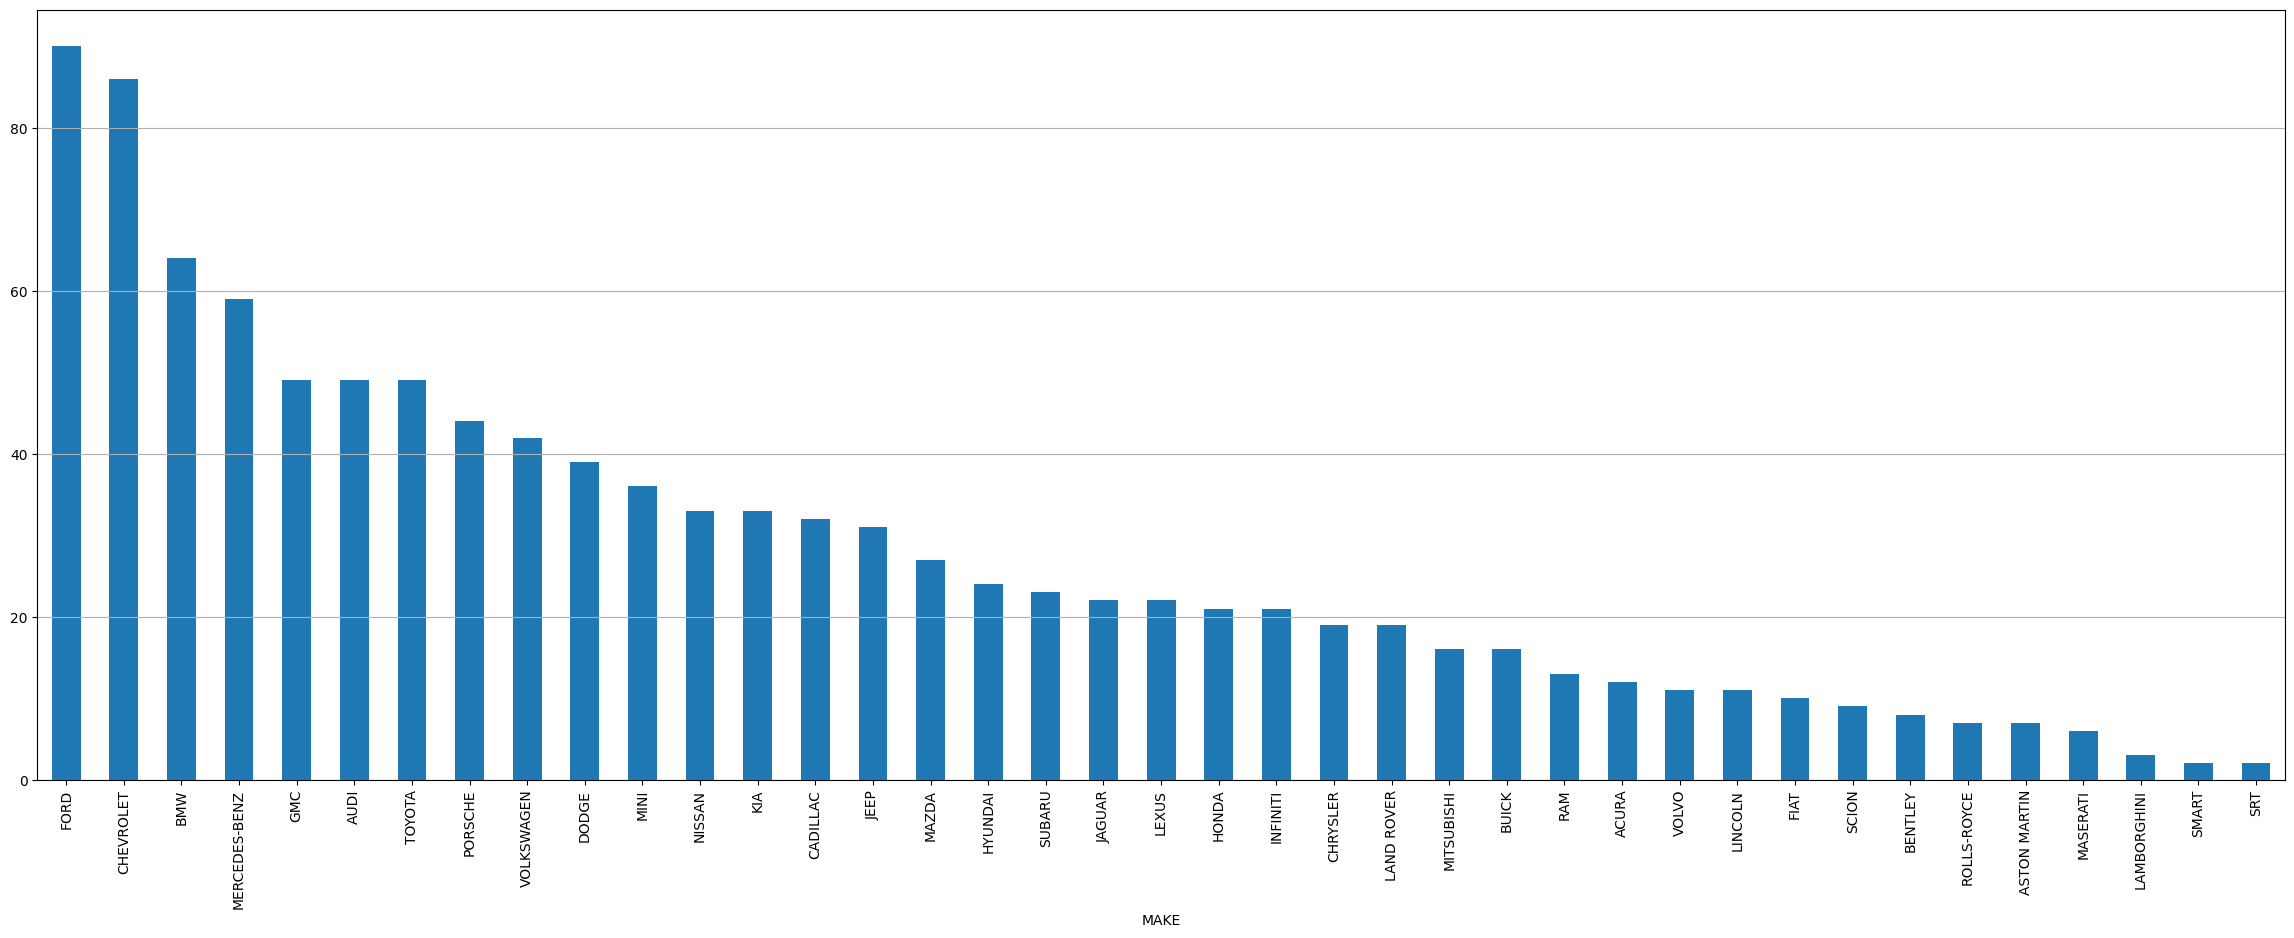

In [8]:
plt.figure(figsize=(29,10))
df['MAKE'].value_counts().plot(kind='bar')
plt.grid(axis='y')

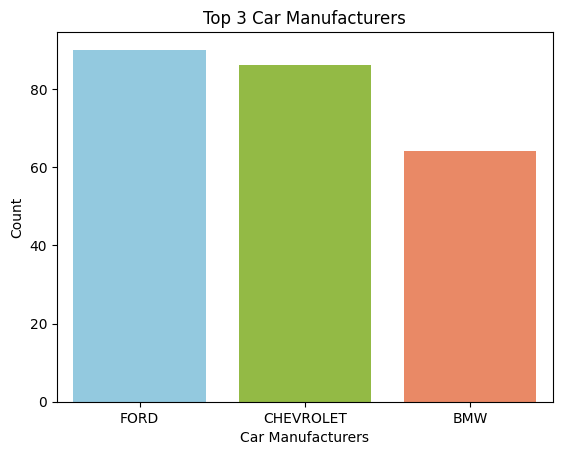

In [9]:
languages=df['MAKE'].value_counts()[0:3]
custom_colors=['skyblue', 'yellowgreen', 'coral']
sns.barplot(x=languages.index, y=languages.values, palette=custom_colors)
plt.xlabel('Car Manufacturers')
plt.ylabel('Count')
plt.title('Top 3 Car Manufacturers')
plt.show()

### Insights:
Out of all the available companies, the following Companies `FORD`, `CHEVROLET`, & `BMW` have the highest number of vehicles.

---

In [10]:
print("The largest size for the Engine is:",df['ENGINESIZE'].max())

The largest size for the Engine is: 8.4


In [11]:
print("The smallest size for the Engine is:",df['ENGINESIZE'].min())

The smallest size for the Engine is: 1.0


In [12]:
print("The average size for the Engine is:",df['ENGINESIZE'].mean())

The average size for the Engine is: 3.346298031865042


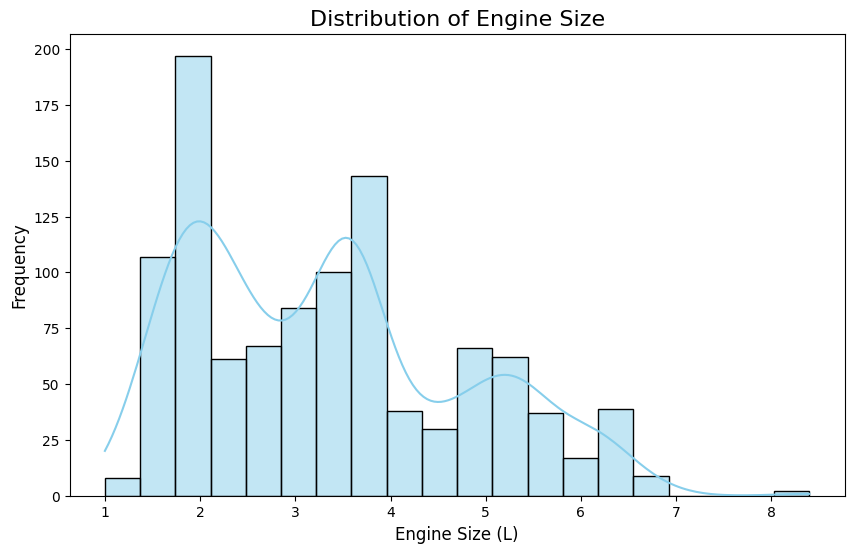

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ENGINESIZE'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Engine Size', fontsize=16)
plt.xlabel('Engine Size (L)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Insight:
Larger engines are less common, indicating a preference for smaller engines.

---

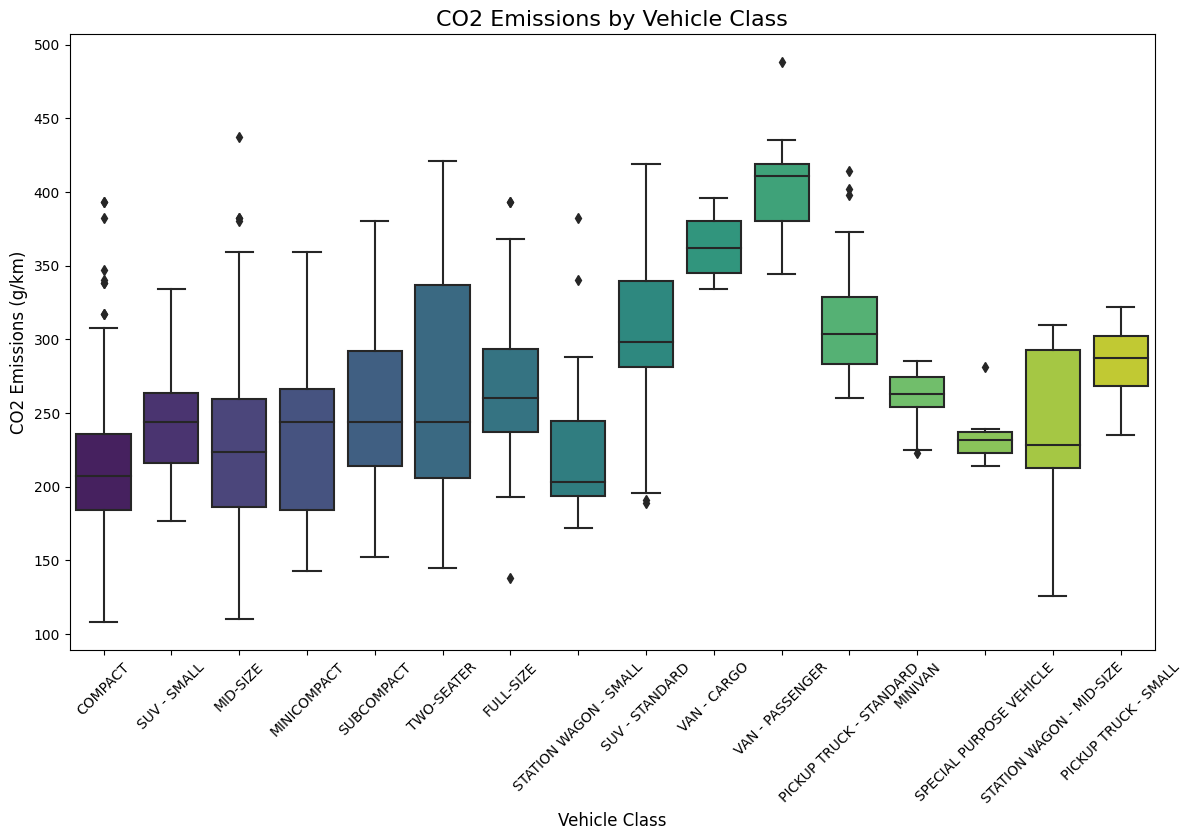

In [14]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='VEHICLECLASS', y='CO2EMISSIONS', data=df, palette="viridis")
plt.xticks(rotation=45)
plt.title('CO2 Emissions by Vehicle Class', fontsize=16)
plt.xlabel('Vehicle Class', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.show()

### Insight:
SUVs and larger vehicles generally produce more CO2 compared to compact cars.

---

D:\Jupyter Notebook\dav\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


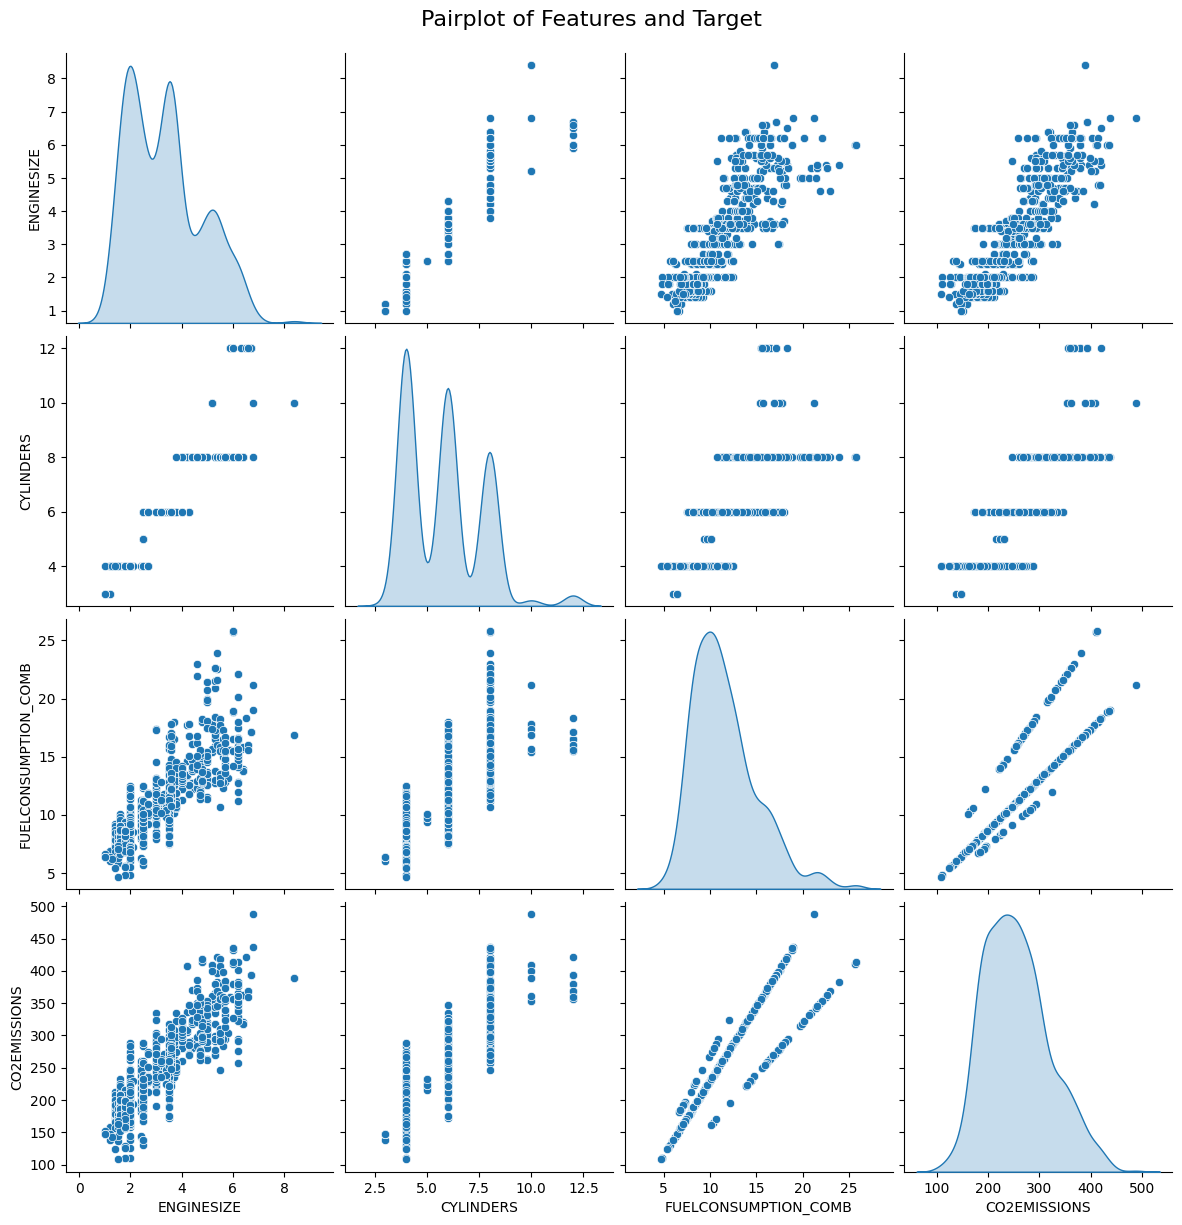

In [15]:
correlation_features=['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']
sns.pairplot(df[correlation_features], diag_kind='kde', height=3)
plt.suptitle("Pairplot of Features and Target", y=1.02, fontsize=16)
plt.show()

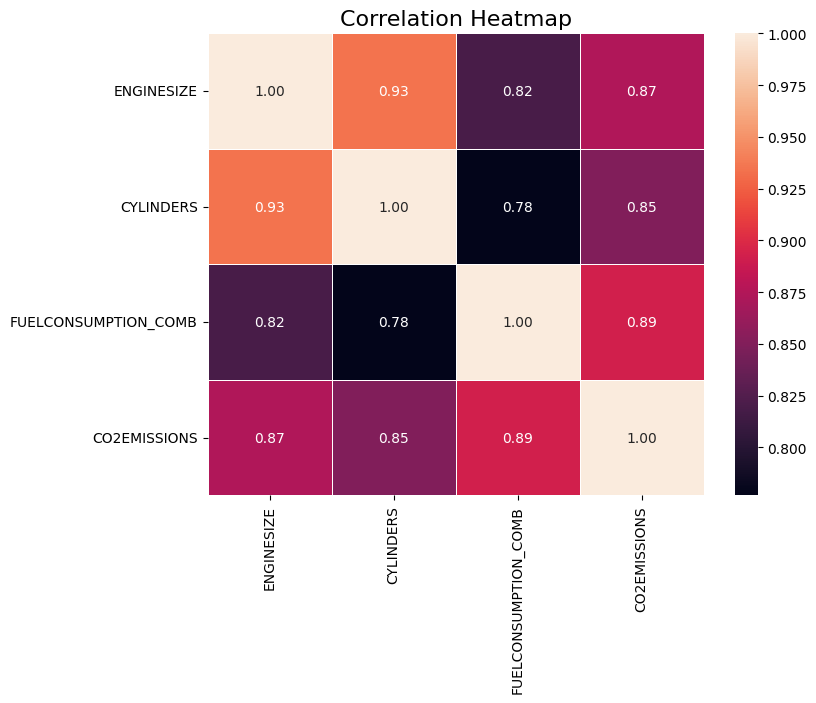

In [16]:
plt.figure(figsize=(8, 6))
correlation_matrix=df[correlation_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

### Insight:
CO2 emissions have a strong positive correlation with `Engine Size`, `Cylinders`, and `Fuel Consumption_Combined`.

---

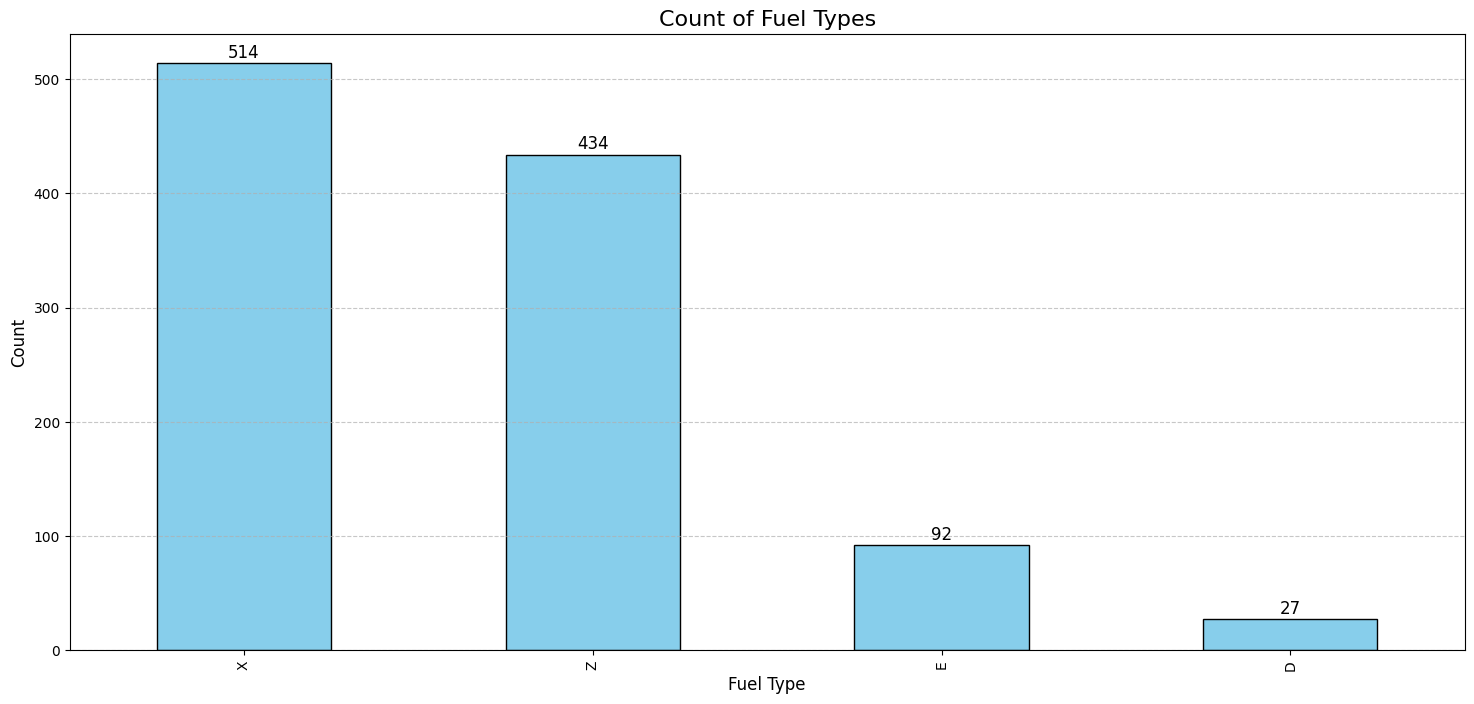

In [17]:
plt.figure(figsize=(18, 8))
bar_plot=df['FUELTYPE'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
for index, value in enumerate(df['FUELTYPE'].value_counts()):
    plt.text(index, value + 5, str(value), ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Count of Fuel Types', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

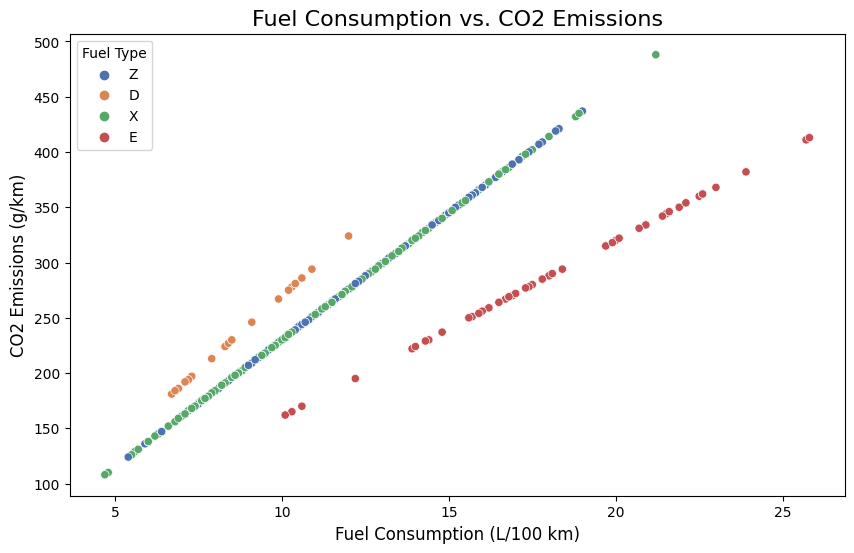

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FUELCONSUMPTION_COMB', y='CO2EMISSIONS', hue='FUELTYPE', data=df, palette='deep')
plt.title('Fuel Consumption vs. CO2 Emissions', fontsize=16)
plt.xlabel('Fuel Consumption (L/100 km)', fontsize=12)
plt.ylabel('CO2 Emissions (g/km)', fontsize=12)
plt.legend(title='Fuel Type')
plt.show()

### Insights:
Higher fuel consumption results in higher CO2 emissions, regardless of fuel type.

---

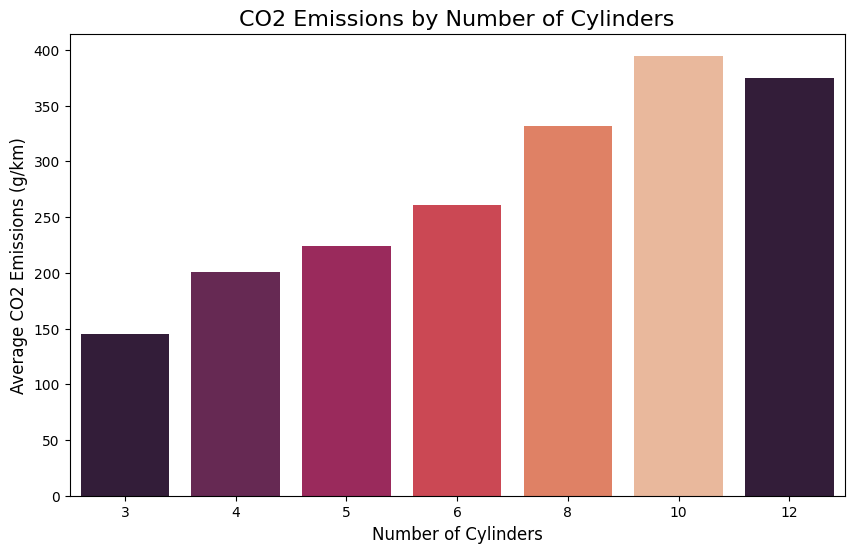

In [19]:
plt.figure(figsize=(10, 6))
palt=sns.color_palette("rocket")
sns.barplot(x='CYLINDERS', y='CO2EMISSIONS', data=df, errorbar=None, palette=palt)
plt.title('CO2 Emissions by Number of Cylinders', fontsize=16)
plt.xlabel('Number of Cylinders', fontsize=12)
plt.ylabel('Average CO2 Emissions (g/km)', fontsize=12)
plt.show()

### Insight:
Vehicles with more cylinders tend to produce higher CO2 emissions.

---

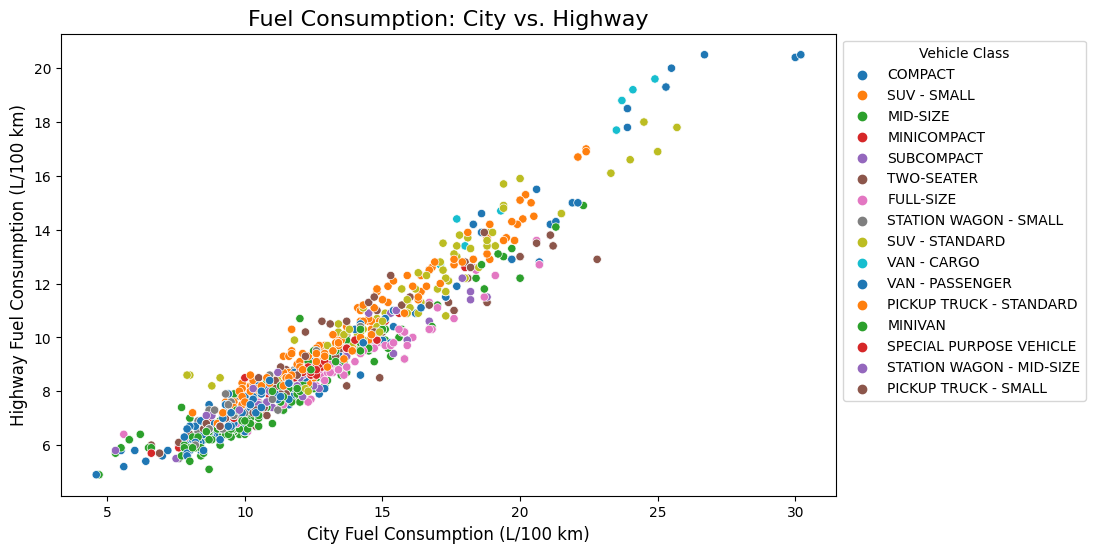

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='FUELCONSUMPTION_CITY', y='FUELCONSUMPTION_HWY', hue='VEHICLECLASS', data=df, palette='tab10')
plt.title('Fuel Consumption: City vs. Highway', fontsize=16)
plt.xlabel('City Fuel Consumption (L/100 km)', fontsize=12)
plt.ylabel('Highway Fuel Consumption (L/100 km)', fontsize=12)
plt.legend(title='Vehicle Class', bbox_to_anchor=(1, 1))
plt.show()

### Insight:
Highway fuel consumption is generally lower than city consumption across all vehicle classes.

---
# 🍀Outlier Detection

In [21]:
def detect_outliers(df, column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    
    IQR=Q3 - Q1

    lower_bound=Q1 - 1.5 * IQR
    upper_bound=Q3 + 1.5 * IQR

    outliers=df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    return outliers, lower_bound, upper_bound

In [22]:
outliers_enginesize, lower_bound_enginesize, upper_bound_enginesize=detect_outliers(df, 'ENGINESIZE')
outliers_cylinders, lower_bound_cylinders, upper_bound_cylinders=detect_outliers(df, 'CYLINDERS')
outliers_co2emissions, lower_bound_co2emissions, upper_bound_co2emissions=detect_outliers(df, 'CO2EMISSIONS')

print(f"Outliers in ENGINESIZE: {len(outliers_enginesize)}")
print(f"Outliers in CYLINDERS: {len(outliers_cylinders)}")
print(f"Outliers in CO2EMISSIONS: {len(outliers_co2emissions)}")

Outliers in ENGINESIZE: 2
Outliers in CYLINDERS: 0
Outliers in CO2EMISSIONS: 6


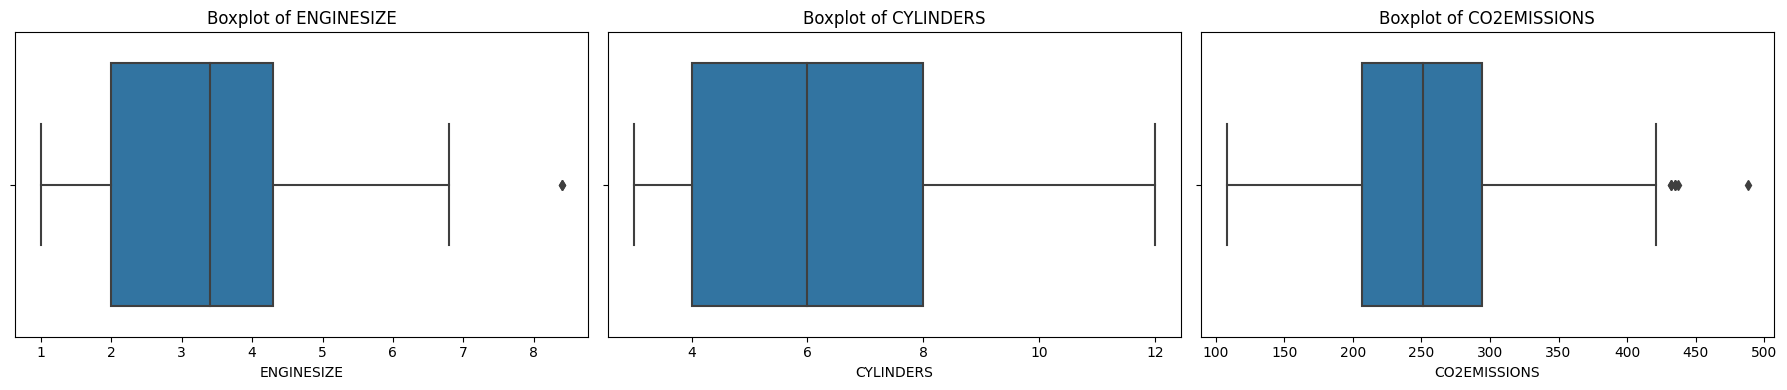

In [23]:
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
sns.boxplot(x=df['ENGINESIZE'])
plt.title('Boxplot of ENGINESIZE')

plt.subplot(1, 3, 2)
sns.boxplot(x=df['CYLINDERS'])
plt.title('Boxplot of CYLINDERS')

plt.subplot(1, 3, 3)
sns.boxplot(x=df['CO2EMISSIONS'])
plt.title('Boxplot of CO2EMISSIONS')

plt.tight_layout()
plt.show()

---
# 🍀Model Training

In [24]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [26]:
X=df.drop(columns=['CO2EMISSIONS', 'MAKE', 'MODEL']) ## Dropping Unnecessary Columns
y=df['CO2EMISSIONS']

In [27]:
X=pd.get_dummies(X, columns=['VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], drop_first=True)
X.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,VEHICLECLASS_FULL-SIZE,VEHICLECLASS_MID-SIZE,VEHICLECLASS_MINICOMPACT,VEHICLECLASS_MINIVAN,VEHICLECLASS_PICKUP TRUCK - SMALL,VEHICLECLASS_PICKUP TRUCK - STANDARD,VEHICLECLASS_SPECIAL PURPOSE VEHICLE,VEHICLECLASS_STATION WAGON - MID-SIZE,VEHICLECLASS_STATION WAGON - SMALL,VEHICLECLASS_SUBCOMPACT,VEHICLECLASS_SUV - SMALL,VEHICLECLASS_SUV - STANDARD,VEHICLECLASS_TWO-SEATER,VEHICLECLASS_VAN - CARGO,VEHICLECLASS_VAN - PASSENGER,TRANSMISSION_A5,TRANSMISSION_A6,TRANSMISSION_A7,TRANSMISSION_A8,TRANSMISSION_A9,TRANSMISSION_AM5,TRANSMISSION_AM6,TRANSMISSION_AM7,TRANSMISSION_AS4,TRANSMISSION_AS5,TRANSMISSION_AS6,TRANSMISSION_AS7,TRANSMISSION_AS8,TRANSMISSION_AS9,TRANSMISSION_AV,TRANSMISSION_AV6,TRANSMISSION_AV7,TRANSMISSION_AV8,TRANSMISSION_M5,TRANSMISSION_M6,TRANSMISSION_M7,FUELTYPE_E,FUELTYPE_X,FUELTYPE_Z
0,2014,2.0,4,9.9,6.7,8.5,33,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2014,2.4,4,11.2,7.7,9.6,29,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,2014,1.5,4,6.0,5.8,5.9,48,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True
3,2014,3.5,6,12.7,9.1,11.1,25,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True
4,2014,3.5,6,12.1,8.7,10.6,27,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True


In [28]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [30]:
# Linear Regression
linear_model=LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_lr=linear_model.predict(X_test_scaled)

In [31]:
# Random Forest Regressor
rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf=rf_model.predict(X_test)

In [32]:
# Decision Tree Regressor
dt_model=DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt=dt_model.predict(X_test)

In [33]:
def evaluate_model(y_test, y_pred, model_name):
    mae=mean_absolute_error(y_test, y_pred)
    rss=np.sum((y_test - y_pred) ** 2)
    r2=r2_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Residual Sum of Squares (RSS): {rss:.2f}")
    print(f"R² Score: {r2:.2f}")
    print("-" * 30)

evaluate_model(y_test, y_pred_lr, "Linear Regression")

evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

evaluate_model(y_test, y_pred_dt, "Decision Tree Regressor")

Linear Regression Performance:
Mean Absolute Error (MAE): 3.46
Residual Sum of Squares (RSS): 6978.98
R² Score: 0.99
------------------------------
Random Forest Regressor Performance:
Mean Absolute Error (MAE): 1.72
Residual Sum of Squares (RSS): 7635.51
R² Score: 0.99
------------------------------
Decision Tree Regressor Performance:
Mean Absolute Error (MAE): 1.62
Residual Sum of Squares (RSS): 10360.00
R² Score: 0.99
------------------------------
